In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [90]:
data = pd.read_csv('Diwali Sales Data.csv', encoding = 'unicode_escape')

In [91]:
data.shape

(11251, 15)

In [92]:
data.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [94]:
#check for null values in columns
data.isna().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [95]:
#remove unrelated/blank columns from the data
data.drop(['Status', 'unnamed1'], axis = 1, inplace = True)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [97]:
#Drop records with nulls in any of the columns. 
data = data.dropna()
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [98]:
#change data type to int
data['Amount'] = data['Amount'].astype('int')

In [99]:
data['Amount'].dtypes

dtype('int32')

In [100]:
data.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [101]:
#describe for specific columns
data[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## Exploratory Data Analysis

### Gender

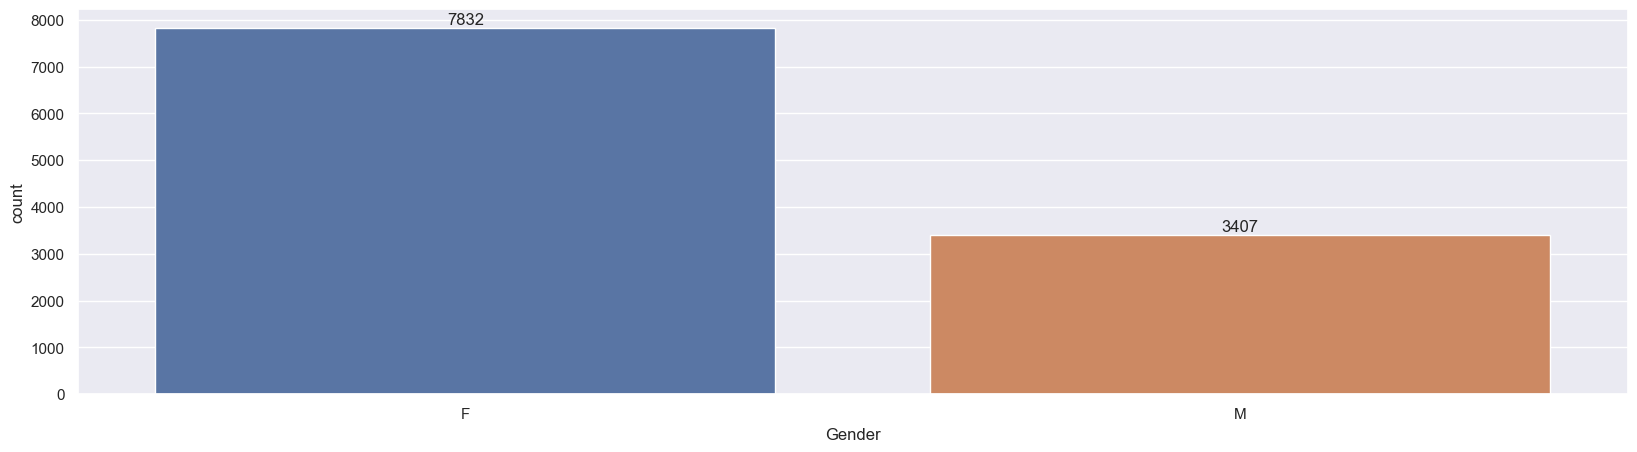

In [102]:
#plot a bar chart with gender and its counts
ax = sns.countplot(x = 'Gender', data = data)
for bars in ax.containers:
	ax.bar_label(bars)

<AxesSubplot:xlabel='Gender', ylabel='Amount'>

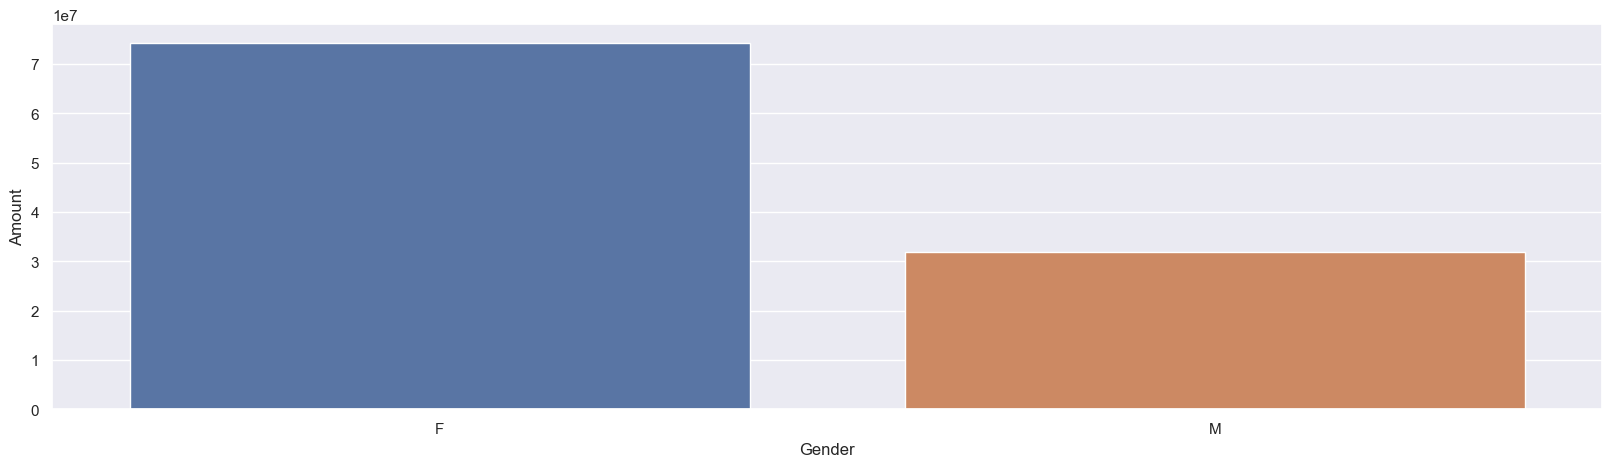

In [103]:
#plot bar chart for Gender vs total amount
sales_gender = data.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Gender', y='Amount', data= sales_gender)

From above graph we can see that there are more female buyer than males

## Age

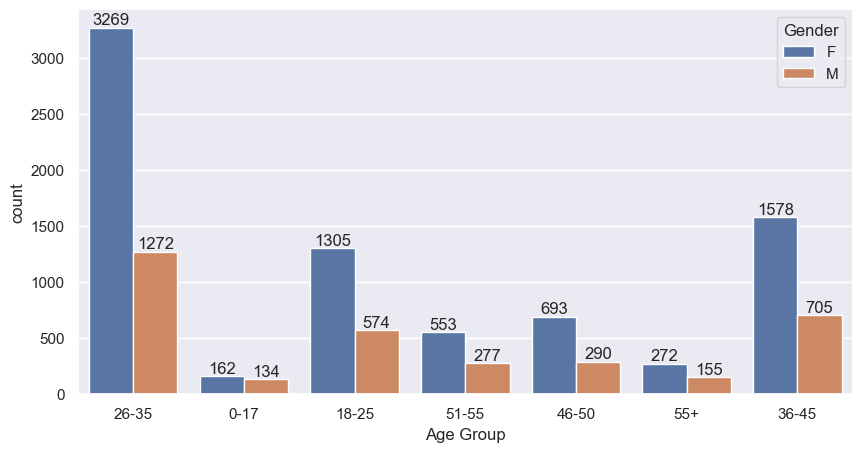

In [106]:
# Lets plot a bar graph to study the age group of buyers gender wise 
sns.set(rc={'figure.figsize':(10,5)})
age_plt = sns.countplot(data = data, x = 'Age Group', hue = 'Gender')
for bars in age_plt.containers:
    age_plt.bar_label(bars)

<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

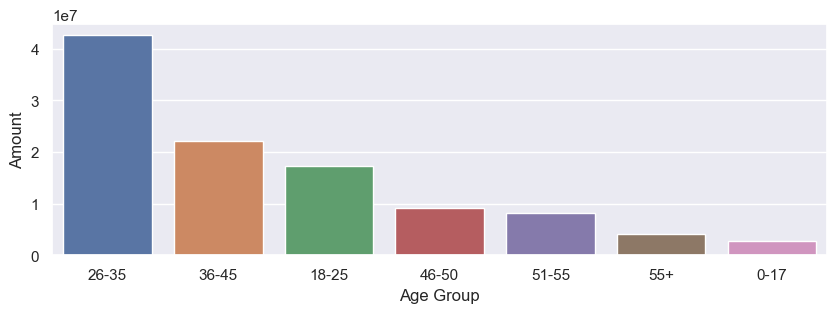

In [108]:
# Plotting a graph of age group vs total sales
sales_ageGrp = data.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(['Amount'], ascending=False)
sns.barplot(x='Age Group', y='Amount', data = sales_ageGrp)

Above graphs indicate that most of the buyers are from the age group 25-35 years females

## State

<AxesSubplot:xlabel='State', ylabel='Orders'>

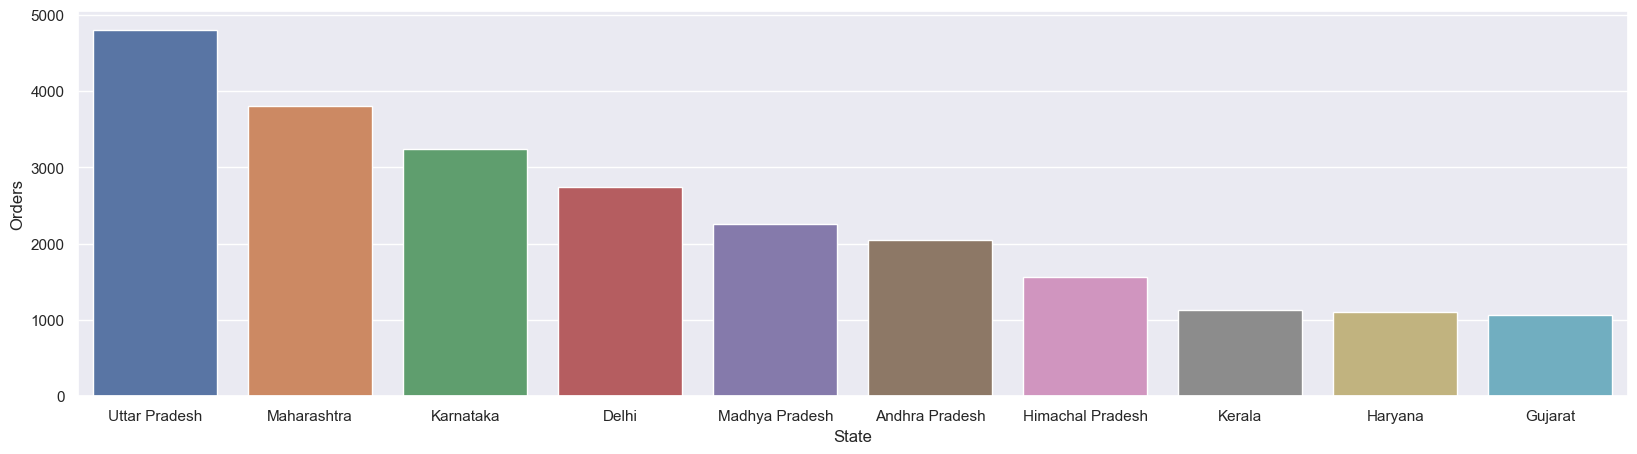

In [111]:
# plotting the total orders brought in by top 10 states
orders_State = data.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=orders_State, x='State', y='Orders')

<AxesSubplot:xlabel='State', ylabel='Amount'>

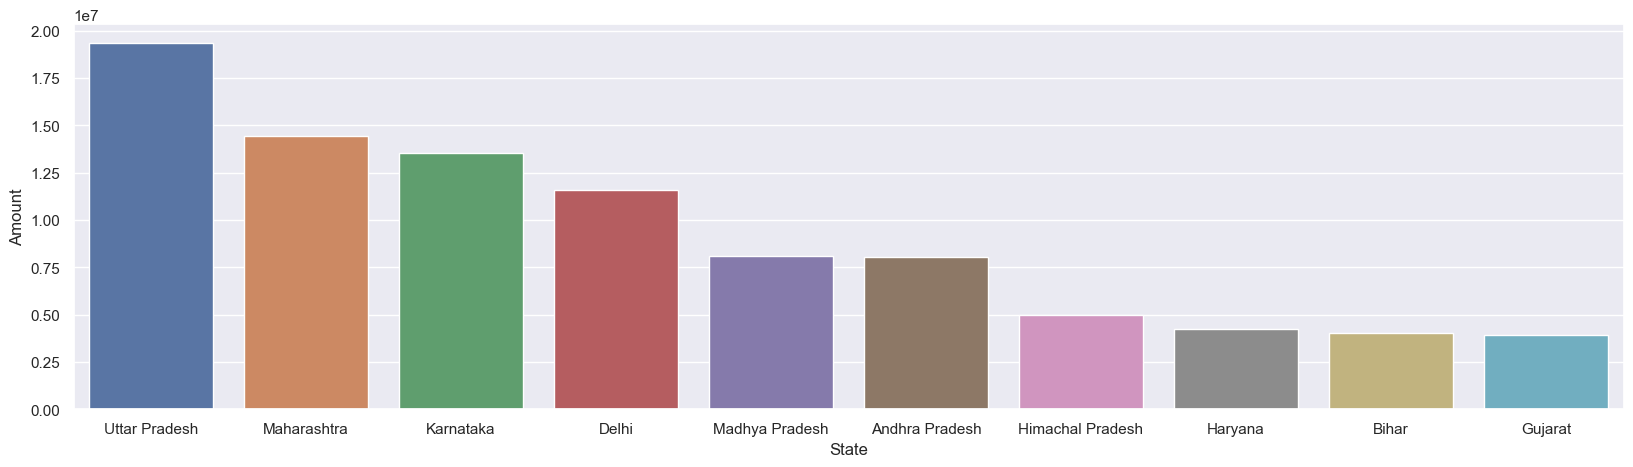

In [112]:
# plotting the total amount/sales brought in by top 10 states
sales_State = data.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_State, x='State', y='Amount')

From above graphs we can see that Uttar Pradesh has the highest orders and Total Sales amoung top 10 states followed by Maharashtra and Karnataka respectivelt.

## Marital Status

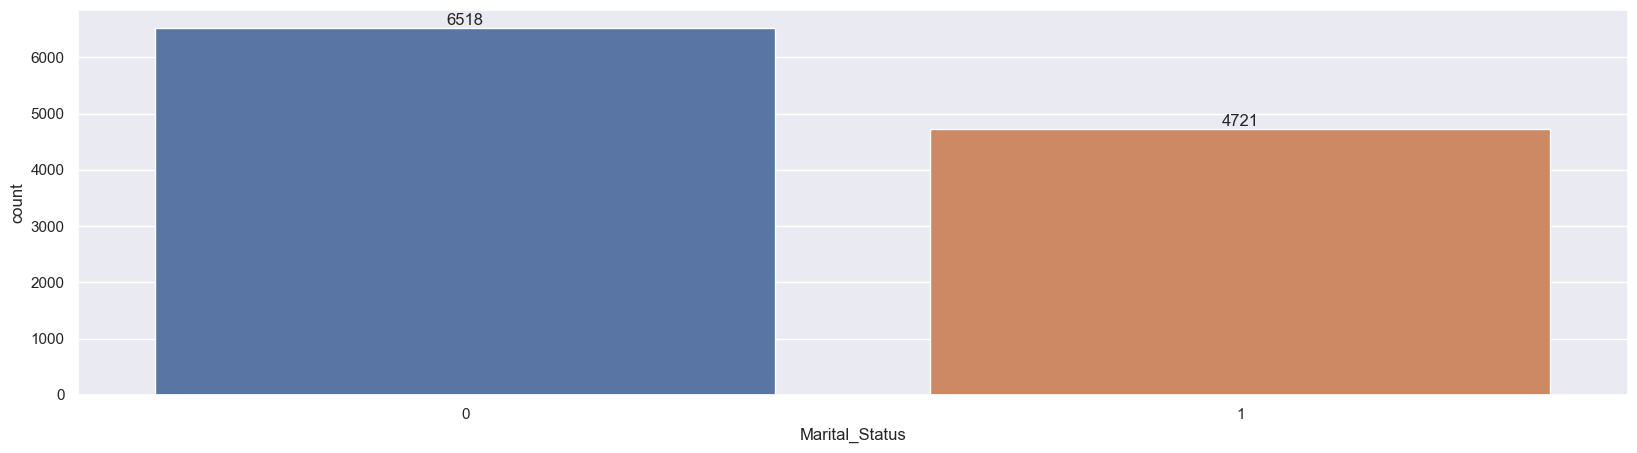

In [113]:
# Plotting the bar graph for marital status
ms_plt = sns.countplot(data=data, x='Marital_Status')
for bars in ms_plt.containers:
    ms_plt.bar_label(bars)

<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

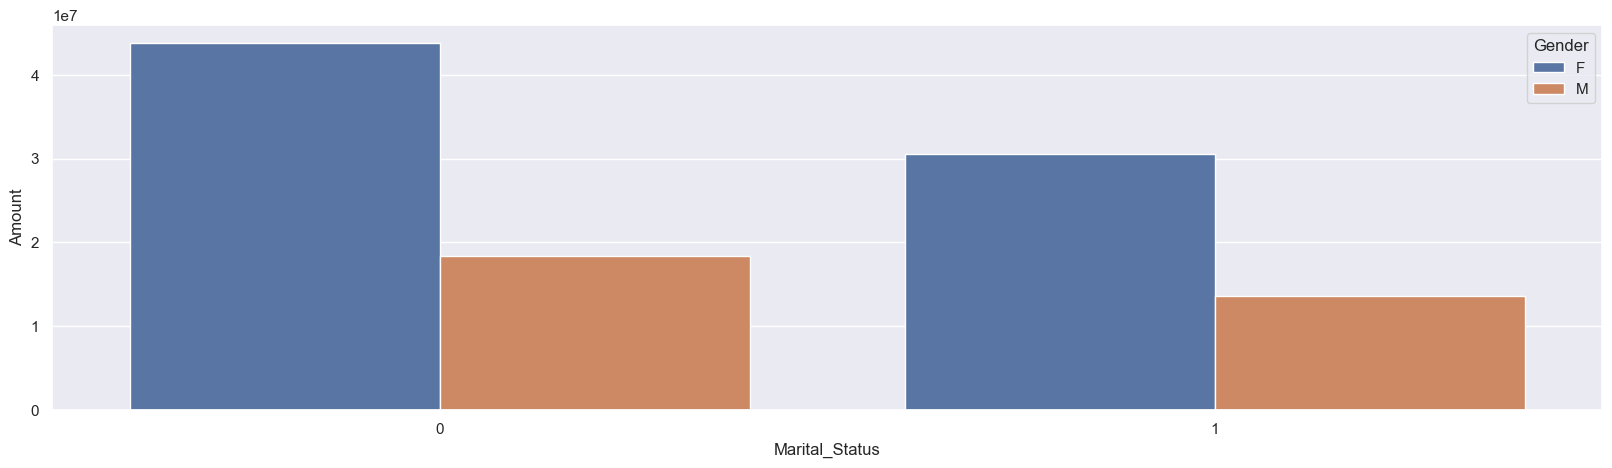

In [114]:
# plotting bar graph to study the total Sales based on marital status of a customer
sales_ms = data.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(data=sales_ms, x='Marital_Status', y='Amount', hue='Gender')

From above graphs we can see that most of the buyers are married females and they are higher purchasing power.

## Occupation

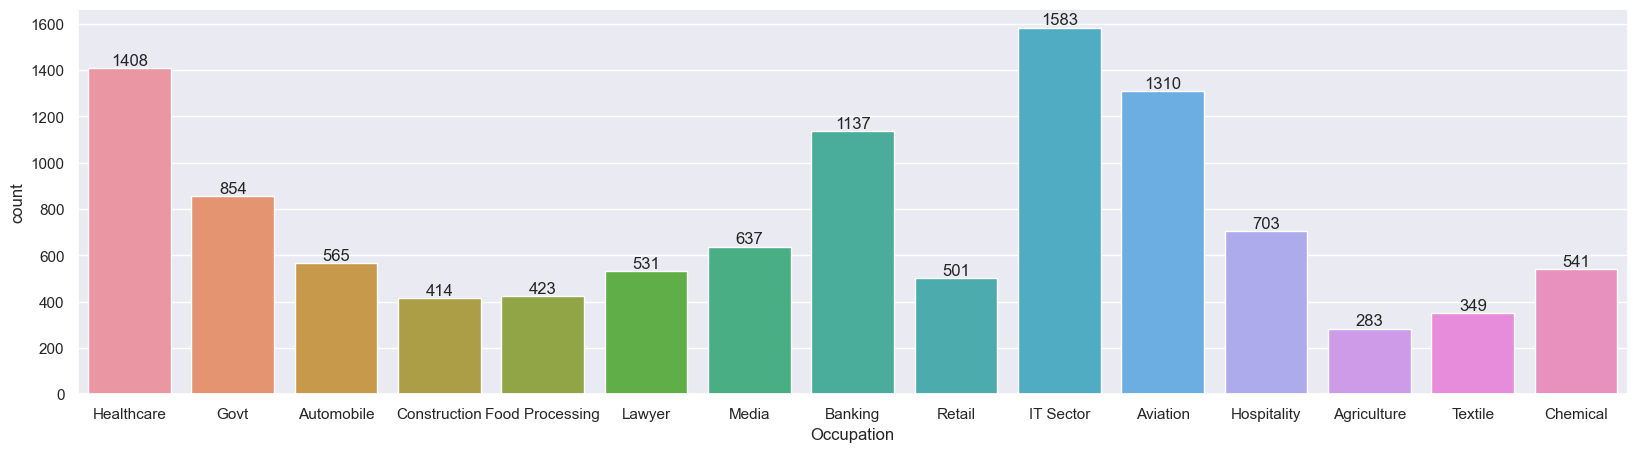

In [115]:
#Plotting the bar graph for Occupations
sns.set(rc={'figure.figsize':(20,5)})
occ_plt = sns.countplot(data=data, x='Occupation')
for bars in occ_plt.containers:
    occ_plt.bar_label(bars)

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

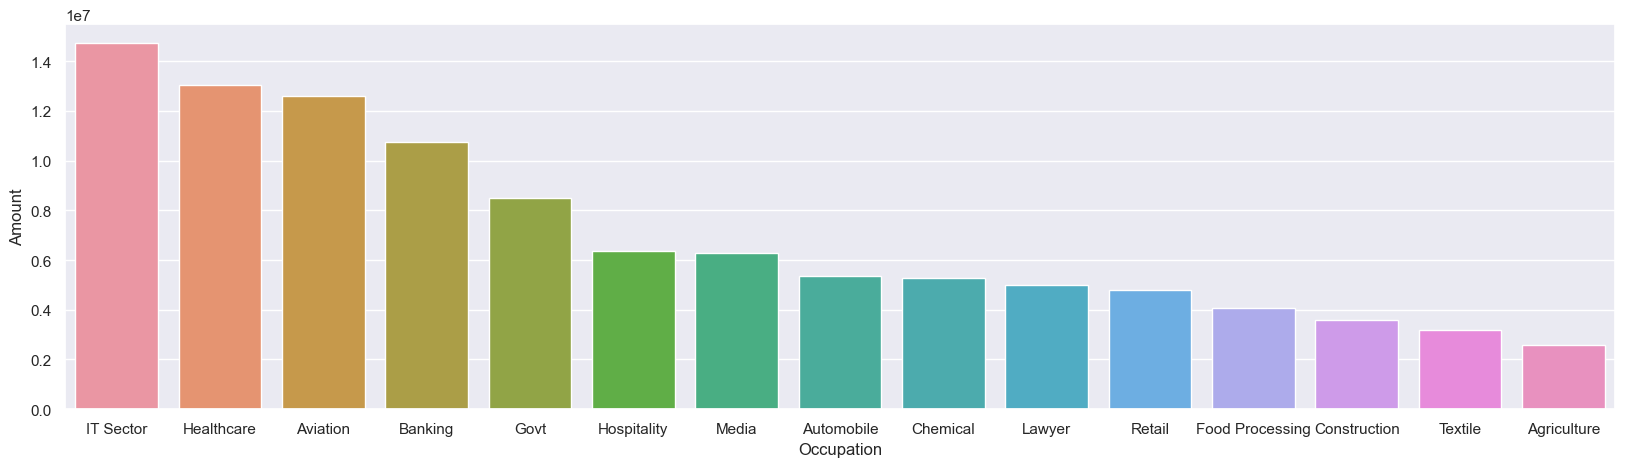

In [116]:
# Plotting the bar graph for total sales across each occupation
sns.set(rc={'figure.figsize':(20,5)})
sales_occp = data.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(data=sales_occp, x='Occupation', y='Amount')

From above graph we can see that most buyers are working in IT Sector, healthcare or aviation

## Product Category

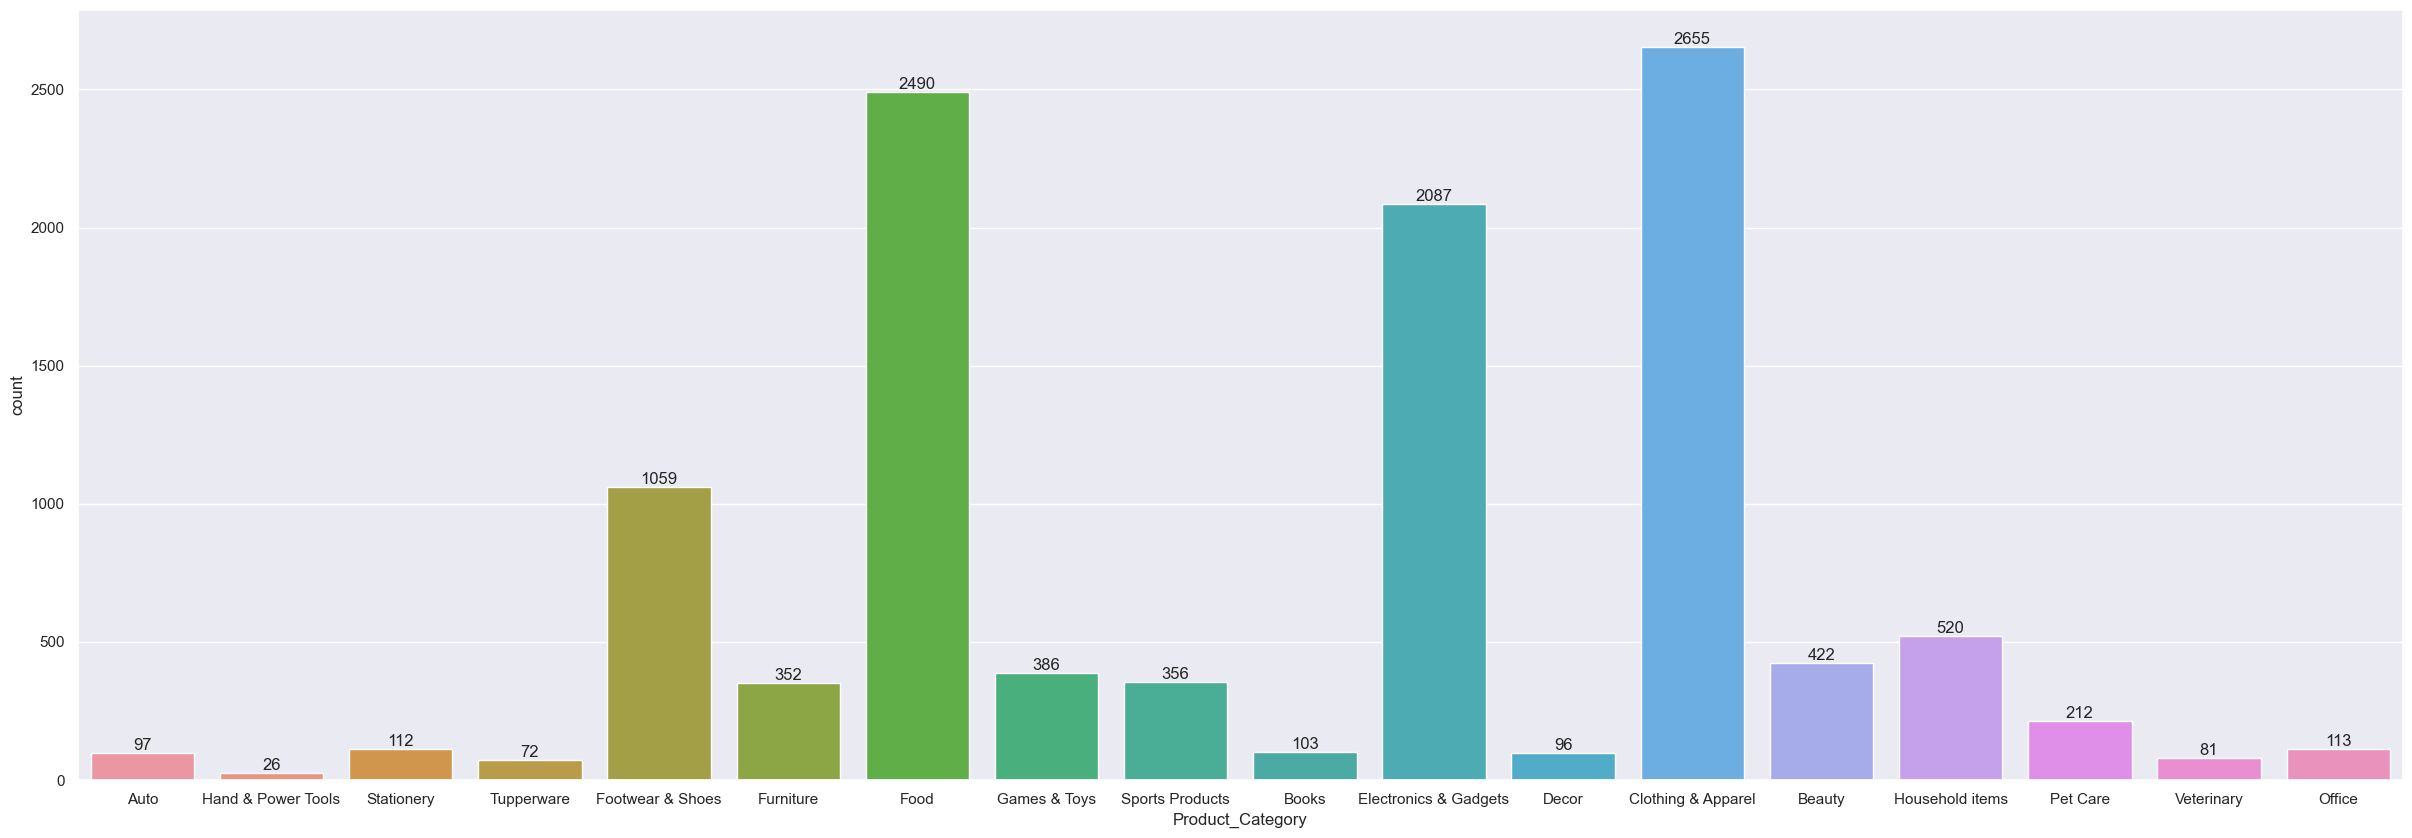

In [117]:
# Plotting a bar graph for product category
sns.set(rc={'figure.figsize':(30,10)})
pc_plt = sns.countplot(data=data, x='Product_Category')
for bars in pc_plt.containers:
    pc_plt.bar_label(bars)

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

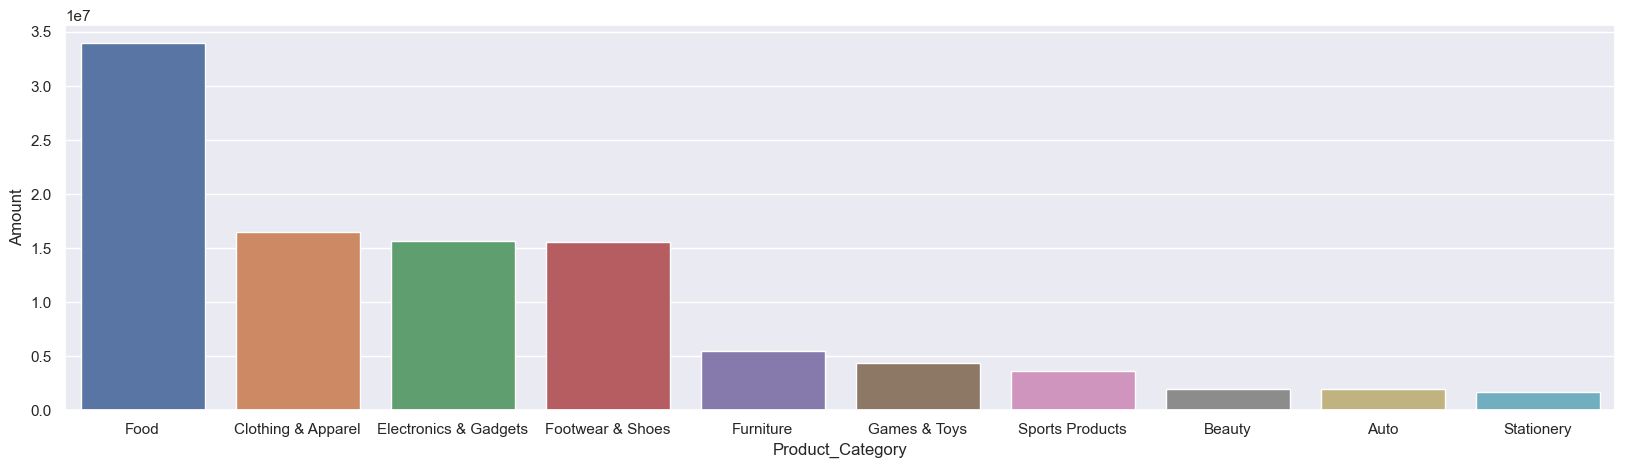

In [118]:
#plotting a graph for total sales for each product category
sns.set(rc={'figure.figsize':(20,5)})
sales_pc = data.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values('Amount', ascending=False).head(10)
sns.barplot(data=sales_pc, x='Product_Category', y='Amount')

From above graph we can see that most sold products are from Food, Clothing & Apparel and Electronics & Gadgets categories

## Product ID

<AxesSubplot:xlabel='Product_ID', ylabel='Orders'>

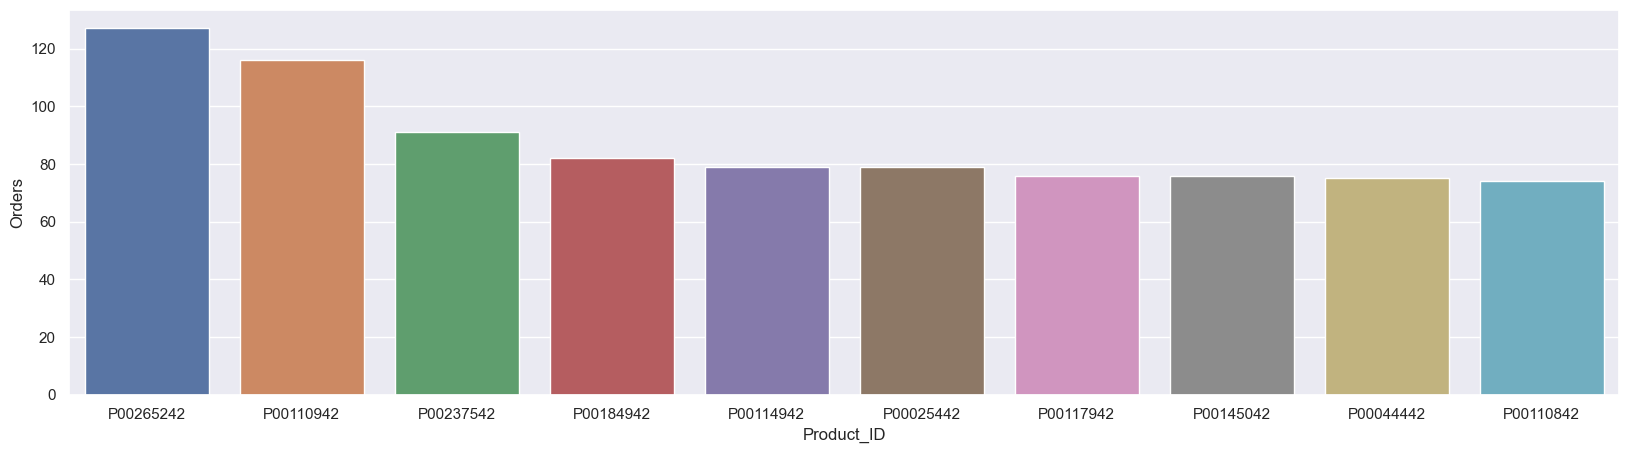

In [119]:
#plotting bar graph for top 10 most ordered products
sns.set(rc={'figure.figsize':(20,5)})
sales_state = data.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

<AxesSubplot:>

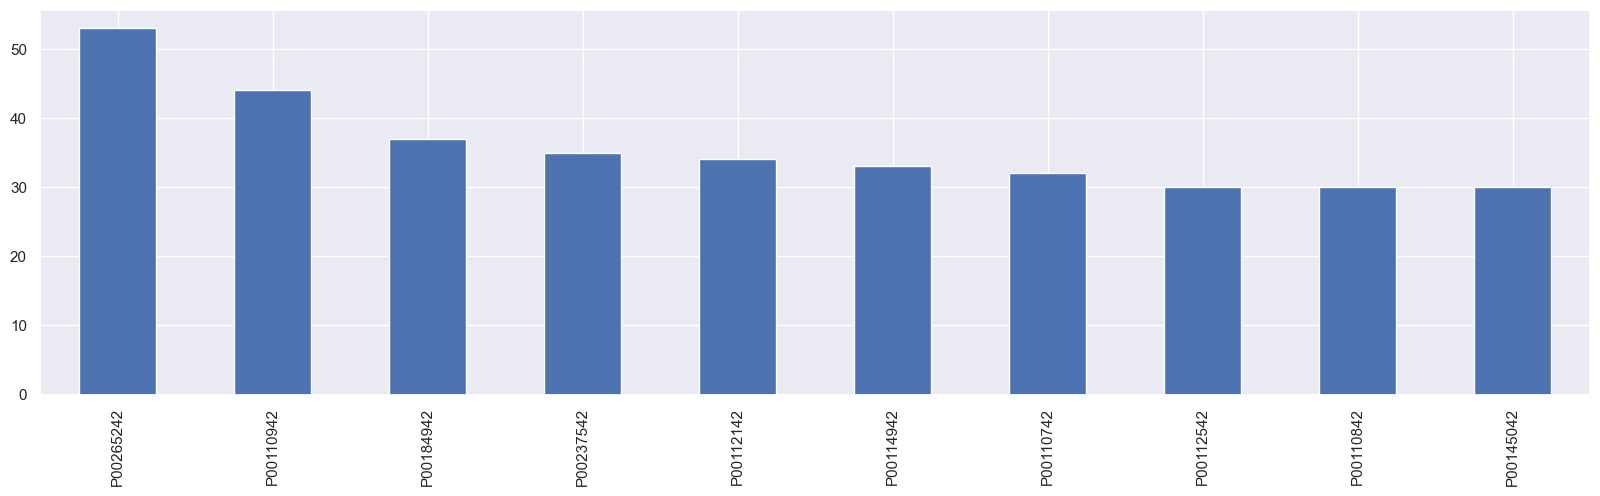

In [120]:
# same as above top 10 most sold products but using matplotlib
top_prods = (data['Product_ID'].value_counts()).iloc[:10]
top_prods.plot(kind='bar')

## Conclusion:

Married women from the age group 25-35 years from Uttar Pradesh, Maharashtra and Karnataka, working in IT sectors, Healthcare and Aviations are more likely to buy product from Food, Clothing and Electronics categories. 